## Week8 LogisticRegression
In week 8, we've covered:
* Logistic regression
* Build logistic regression model with Sklearn  

Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a **TODO**.

Upload **Week8_LogisiceRegression_Homework.ipynb**, **train.csv** and **test.csv** to Google Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**TODO**: Replace **`YourFolderName`**  below with the folder name on your google drive where you put the `housing.csv` file. Run the cell, check if `train.csv` and `test.csv` is listed.

In [ ]:
!ls /content/drive/My\ Drive/Homegrown_examples

Alternative method to upload if mounting drive doesn't work

In [1]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


## 1. Introduction

In this homework we're going to learn how to build an ML model. We will:

* Explore the data and learn about the topic
* Prepare data for machine learning
* Train a model
* Measure the accuracy of your model

The dataset is about predicting which passengers survived the **sinking of the Titanic**.

In [6]:
# TODO Replace YourFolderName with the folder name on your google drive
import pandas as pd
import io

# test = pd.read_csv("/content/drive/My Drive/YourFolderName/test.csv")
#test = pd.read_csv(io.BytesIO(uploaded['test.csv'])) # Alternative method to read csv if mounting drive doesn't work
test = pd.read_csv('test.csv')
test_shape = test.shape
print(test_shape)

(418, 11)


### Instructions

Use ```pandas.read_csv()``` to import ```train.csv``` and assign it to the variable ```train```.
Use ```DataFrame.shape``` to calculate the number of rows and columns in ```train```, and assign the result to ```train_shape```.

In [7]:
# TODO
#train = pd.read_csv(io.BytesIO(uploaded['train.csv'])) # Alternative method to read csv if mounting drive doesn't work
train = pd.read_csv('train.csv')
train_shape = train.shape
print(train_shape)

(891, 12)


## 2. Exploring the data - Categorical feature

Below are the descriptions contained in that data dictionary:

* *PassengerID* - A column added by us to identify each row and make submissions easier
* *Survived* - Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)
* *Pclass* - The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)
* *Sex* - The passenger's sex
* *Age* - The passenger's age in years
* *SibSp* - The number of siblings or spouses the passenger had aboard the Titanic
* *Parch* - The number of parents or children the passenger had aboard the Titanic
* *Ticket* - The passenger's ticket number
* *Fare* - The fare the passenger paid
* *Cabin* - The passenger's cabin number
* *Embarked* - The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)

### Let's get a view of the actual data

In [8]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


The type of machine learning we will be doing is called classification, because when we make predictions we are classifying each passenger as survived or not. More specifically, we are performing binary classification, which means that there are only two different states we are classifying.

In any machine learning exercise, thinking about the topic you are predicting is very important. We call this step acquiring domain knowledge, and it's one of the most important determinants for success in machine learning.

In this case, understanding the Titanic disaster and specifically what variables might affect the outcome of survival is important. Anyone who has watched the movie Titanic would remember that women and children were given preference to lifeboats (as they were in real life). You would also remember the vast class disparity of the passengers.

This indicates that Age, Sex, and PClass may be good predictors of survival. We'll start by exploring Sex and Pclass by visualizing the data.

Because the Survived column contains 0 if the passenger did not survive and 1 if they did, we can segment our data by sex and calculate the mean of this column. We can use DataFrame.pivot_table() to easily do this:

In [10]:
import matplotlib.pyplot as plt

sex_pivot = train.pivot_table(index="Sex",values="Survived")
sex_pivot

Matplotlib is building the font cache; this may take a moment.


,Survived
Sex,
female,0.742038
male,0.188908


We can immediately see that females survived in much higher proportions than males did.

Let's do the same with the Pclass column.

### Instructions

* Use ```DataFrame.pivot_table()``` to pivot the ```train``` dataframe:
    * Use "Pclass" for the index parameter.
    * Use "Survived" for the values parameter.
* Use ```DataFrame.plot.bar()``` to plot the pivot table.

<Axes: xlabel='Pclass'>

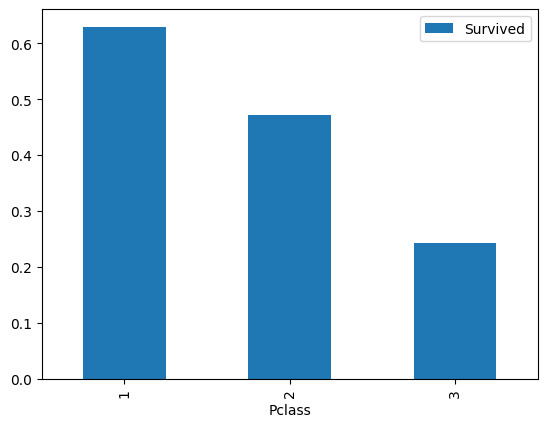

In [11]:
# TODO - IT SHOULD LOOK LIKE THE FIGURE BELOW
pclass_pivot = train.pivot_table(index="Pclass",values="Survived")
pclass_pivot.plot.bar()

## 3. Exploring and Converting the age column - Numerical feature

The Sex and PClass columns are what we call categorical features. That means that the values represented a few separate options (for instance, whether the passenger was male or female).

Let's take a look at the Age column using [```Series.describe()```](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.describe.html). 

In [12]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

The Age column contains numbers ranging from 0.42 to 80.0 (does this mean that Age is fractional if the passenger is less than one?). The other thing to note here is that there are 714 values in this column, fewer than the 814 rows we discovered that the train data set had earlier in this mission which indicates we have some missing values.

All of this means that the Age column needs to be treated slightly differently, as this is a continuous numerical column. One way to look at distribution of values in a continuous numerical set is to use histograms. We can create two histograms to compare visually the those that survived vs those who died across different age ranges:

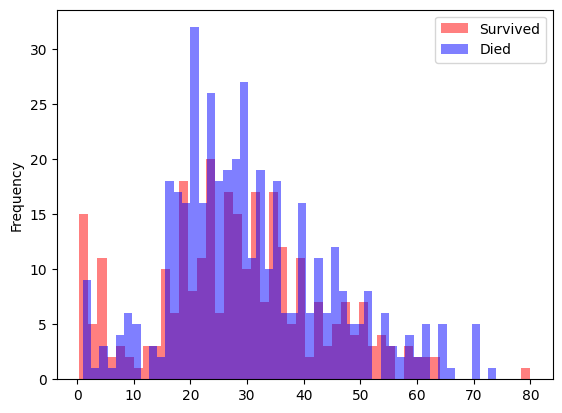

In [13]:
survived = train[train["Survived"] == 1]
died = train[train["Survived"] == 0]
survived["Age"].plot.hist(alpha=0.5,color='red',bins=50)
died["Age"].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['Survived','Died'])
plt.show()

The relationship here is not simple, but we can see that in some age ranges more passengers survived - where the red bars are higher than the blue bars.

In order for this to be useful to our machine learning model, we can separate this continuous feature into a categorical feature by dividing it into ranges. We can use the ```pandas.cut()``` function to help us out.

The ```pandas.cut()``` function has two required parameters - the column we wish to cut, and a list of numbers which define the boundaries of our cuts. We are also going to use the optional parameter labels, which takes a list of labels for the resultant bins. This will make it easier for us to understand our results.

Before we modify this column, we have to be aware of two things. Firstly, any change we make to the train data, we also need to make to the test data, otherwise we will be unable to use our model to make predictions for our submissions. Secondly, we need to remember to handle the missing values we observed above.

We can then use that function on both the ```train``` and ```test``` dataframes.

```python
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

cut_points = [-1,0,18,100]
label_names = ["Missing","Child","Adult"]

train = process_age(train,cut_points,label_names)
test = process_age(test,cut_points,label_names)
```

The diagram below shows how the function converts the data:

![](https://s3.amazonaws.com/dq-content/185/cut.svg)

Note that the cut_points list has one more element than the label_names list, since it needs to define the upper boundary for the last segment.

### Instructions

* Create the ```cut_points``` and ```label_names``` lists to split the ```Age``` column into six categories:
    * Missing, from -1 to 0
    * Infant, from 0 to 5
    * Child, from 5 to 12
    * Teenager, from 12 to 18
    * Young Adult, from 18 to 35
    * Adult, from 35 to 60
    * Senior, from 60 to 100
* Apply the ```process_age()``` function on the train dataframe, assigning the result to train.
* Apply the ```process_age()``` function on the test dataframe, assigning the result to test.
* Use ```DataFrame.pivot_table()``` to pivot the train dataframe by the Age_categories column.
* Use ```DataFrame.plot.bar()``` to plot the pivot table.

/var/folders/w7/ydgc0rqj2d5b73d9vy43nq3r0000gp/T/ipykernel_8481/1717777837.py:13: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  age_categories_pivot = train.pivot_table(index="Age_categories",values="Survived")


<Axes: xlabel='Age_categories'>

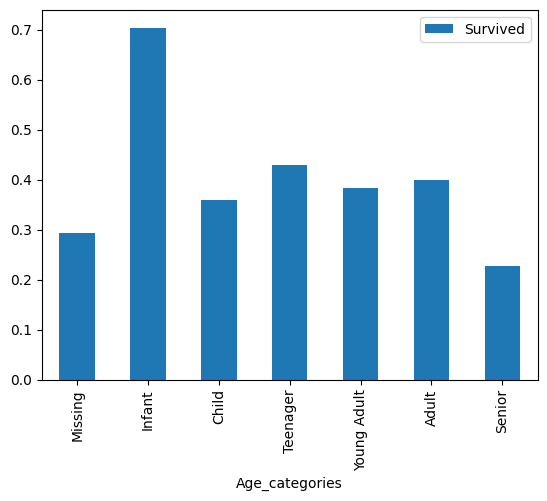

In [14]:
# TODO - IT SHOULD LOOK LIKE THE FIGURE BELOW
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

cut_points = [-1,0,5,12,18,35,60,100]
label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]

train = process_age(train,cut_points,label_names)
test = process_age(test,cut_points,label_names)

age_categories_pivot = train.pivot_table(index="Age_categories",values="Survived")
age_categories_pivot.plot.bar()

## 4. Preparing our Data for Machine Learning

So far we have identified three columns that may be useful for predicting survival:

* Sex
* Pclass
* Age, or more specifically our newly created Age_categories

Before we build our model, we need to prepare these columns for machine learning. Most machine learning algorithms can't understand text labels, so we have to convert our values into numbers.

Additionally, we need to be careful that we don't imply any numeric relationship where there isn't one. If we think of the values in the Pclass column, we know they are 1, 2, and 3.

In [15]:
train['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

While the class of each passenger certainly has some sort of ordered relationship, the relationship between each class is not the same as the relationship between the numbers 1, 2, and 3. For instance, class 2 isn't "worth" double what class 1 is, and class 3 isn't "worth" triple what class 1 is.

In order to remove this relationship, we can create dummy columns for each unique value in Pclass:

![](https://s3.amazonaws.com/dq-content/185/kaggle_get_dummies.svg)

Let's use that function to create dummy columns for both the Sex and Age_categories columns.

In [16]:
# EXAMPLE
column_name = "Pclass"
df = train
dummies = pd.get_dummies(df[column_name],prefix=column_name)
dummies.head()

,Pclass_1,Pclass_2,Pclass_3
0,False,False,True
1,True,False,False
2,False,False,True
3,True,False,False
4,False,False,True


### Instructions

* Use the create_dummies() function to create dummy variables for the Sex column:
    * in the train dataframe.
    * in the test dataframe.
* Use the create_dummies() function to create dummy variables for the Pclass column:
    * in the train dataframe.
    * in the test dataframe.
* Use the create_dummies() function to create dummy variables for the Age_categories column:
    * in the train dataframe.
    * in the test dataframe.

In [17]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

In [18]:
#TODO
column_name = "Pclass"
df_train = train
dummies_train = create_dummies(df_train, column_name)
df_test = test
dummies_test = create_dummies(df_test, column_name)

column_name = "Sex"
dummies_train = create_dummies(dummies_train, column_name)
dummies_test = create_dummies(dummies_test, column_name)

column_name = "Age_categories"
train = create_dummies(dummies_train, column_name)
test = create_dummies(dummies_test, column_name)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Pclass_3,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,True,False,True,False,False,False,False,True,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,False,True,False,False,False,False,False,False,True,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,True,True,False,False,False,False,False,True,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,False,True,False,False,False,False,False,True,False,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,True,False,True,False,False,False,False,True,False,False


## 5. Creating our first machine learning model

Now that our data has been prepared, we are ready to train our first model. The first model we will use is called Logistic Regression, which is often the first model you will train when performing classification.

We will be using the scikit-learn library as it has many tools that make performing machine learning easier. The scikit-learn workflow consists of four main steps:

* Instantiate (or create) the specific machine learning model you want to use
* Fit the model to the training data
* Use the model to make predictions
* Evaluate the accuracy of the predictions
* Each model in scikit-learn is implemented as a separate class and the first step is to identify the class we want to create an instance of. In our case, we want to use the LogisticRegression class.

We'll start by looking at the first two steps. First, we need to import the class:

```python
from sklearn.linear_model import LogisticRegression
```

Next, we create a LogisticRegression object:

```python
lr = LogisticRegression()
```

Lastly, we use the ```LogisticRegression.fit()``` method to train our model. The ```.fit()``` method accepts two arguments: X and y. X must be a two dimensional array (like a dataframe) of the features that we wish to train our model on, and y must be a one-dimensional array (like a series) of our target, or the column we wish to predict.

```python
columns = ['Pclass_2', 'Pclass_3', 'Sex_male']
lr.fit(train[columns], train['Survived'])
```

The code above fits (or trains) our LogisticRegression model using three columns: Pclass_2, Pclass_3, and Sex_male.

Let's train our model using all of the columns we created above.

### Instructions

* Instantiate a LogisticRegression object called lr.
* Use LogisticRegression.fit() to fit the model on the train dataset using:
    * The columns contained in columns as the first (X) parameter.
    * The Survived column as the second (y) parameter.

In [19]:
import warnings
warnings.filterwarnings("ignore")

In [21]:
columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']

from sklearn.linear_model import LogisticRegression

In [22]:
# TODO - Please note that there are slight changes to the default parameters since newer versions of sklearn have been released
lr = LogisticRegression()
lr.fit(train[columns], train['Survived'])

LogisticRegression()

## 6. Splitting our Training Data

Congratulations, you've trained your first machine learning model! Our next step is to find out how accurate our model is, and to do that, we'll have to make some predictions.

If you recall from earlier, we do have a test dataframe that we could use to make predictions. We could make predictions on that data set, but because it doesn't have the Survived column we would have to submit it to DS Teachers to find out our accuracy. This would quickly become a pain if we had to submit to find out the accuracy every time we optimized our model.

We could also fit and predict on our train dataframe, however if we do this there is a high likelihood that our model will overfit, which means it will perform well because we're testing on the same data we've trained on, but then perform much worse on new, unseen data.

Instead we can split our train dataframe into two:

* One part to train our model on (often 80% of the observations)
* One part to make predictions with and test our model (often 20% of the observations)

The convention in machine learning is to call these two parts train and test. This can become confusing, since we already have our test dataframe that we will eventually use to make predictions to submit as part of our homework. To avoid confusion, from here on, we're going to call this 'test' data holdout data, which is the technical name given to this type of data used for final predictions.

The scikit-learn library has a handy [```model_selection.train_test_split()```](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function that we can use to split our data. train_test_split() accepts two parameters, ```X``` and ```y```, which contain all the data we want to train and test on, and returns four objects: ```train_X, train_y, test_X, test_y```:

![](https://s3.amazonaws.com/dq-content/185/kaggle_train_test_split.svg)

Here's what the syntax for creating these four objects looks like:

```python
from sklearn.model_selection import train_test_split

columns = ['Pclass_2', 'Pclass_3', 'Sex_male']

all_X = train[columns]
all_y = train['Survived']

train_X, test_X, train_y, test_y = train_test_split(
    all_X, all_y, test_size=0.2,random_state=0)
```

You'll notice that there are two other parameters we used: ```test_size```, which lets us control what proportions our data are split into, and ```random_state```. The ```train_test_split()``` function randomizes observations before dividing them, and setting a random seed means that our results will be reproducible, which is important if you are collaborating, or need to produce consistent results each time.

### Instructions

* Use the model_selection.train_test_split() function to split the train dataframe using the following parameters:
    * test_size of 0.2.
    * random_state of 0.
* Assign the four returned objects to train_X, test_X, train_y, and test_y.
* Print the shape of train_X.

In [23]:
holdout = test # from now on we will refer to this
               # dataframe as the holdout data

from sklearn.model_selection import train_test_split

columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']

In [24]:
# TODO  
all_X = train[columns]
all_y = train['Survived']

train_X, test_X, train_y, test_y = train_test_split(all_X, all_y, test_size=0.2,random_state=0)
print(train_X.shape)

(712, 12)


## 7. Making Predictions and Measuring their Accuracy

Now that we have our data split into train and test sets, we can fit our model again on our training set, and then use that model to make predictions on our test set.

Once we have fit our model, we can use the ```LogisticRegression.predict()``` method to make predictions.

The ```predict()``` method takes a single parameter ```X```, a two dimensional array of features for the observations we wish to predict. ```X``` must have the exact same features as the array we used to fit our model. The method returns single dimensional array of predictions.

```python
lr = LogisticRegression()
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)
```

There are a number of ways to measure the accuracy of machine learning models, but to keep things simple we will stick to accuracy. Accuracy tells us that our score calculated as "the percentage of passengers correctly predicted". This is by far the most common form of accuracy for binary classification.

As an example, imagine we were predicting a small data set of five observations.

|Our model's prediction|The actual value|Correct|
|----------------------|----------------|-------|
|0                     |0               |Yes    |
|1                     |0               |No     |
|0                     |1               |No     |
|1                     |1               |Yes    |
|1                     |1               |Yes    |

In this case, our model correctly predicted three out of five values, so the accuracy based on this prediction set would be 60%.

Again, scikit-learn has a handy function we can use to calculate accuracy: [```metrics.accuracy_score()```](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html). The function accepts two parameters, ```y_true``` and ```y_pred```, which are the actual values and our predicted values respectively, and returns our accuracy score.

```python 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_y, predictions)
```

Let's put all of these steps together, and get our first accuracy score.

### Instructions

* Instantiate a new ```LogisticRegression()``` object, ```lr```.
* Fit the model using ```train_X``` and ```train_y```.
* Make predictions using ```test_X``` and assign the results to ```predictions```.
* Use ```accuracy_score()``` to compare ```test_y``` and ```predictions```, assigning the result to ```accuracy```
* Print the ```accuracy``` variable.

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
# TODO

# Your accuracy may differ!

lr = LogisticRegression()
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)

accuracy = accuracy_score(test_y, predictions)
print(accuracy)

0.8100558659217877


## Using Cross Validation for More Accurate Error Measurement

Our model has an accuracy score of 81.0% when tested against our 20% test set. Given that this data set is quite small, there is a good chance that our model is overfitting, and will not perform as well on totally unseen data.

To give us a better understanding of the real performance of our model, we can use a technique called **cross validation** to train and test our model on different splits of our data, and then average the accuracy scores.

![](https://s3.amazonaws.com/dq-content/185/kaggle_cross_validation.svg)

The most common form of cross validation, and the one we will be using, is called **k-fold** cross validation. 'Fold' refers to each different iteration that we train our model on, and 'k' just refers to the number of folds. In the diagram above, we have illustrated k-fold validation where k is 5.

We will use scikit-learn's [```model_selection.cross_val_score()``` function](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) to automate the process. The basic syntax for ```cross_val_score()``` is:

```python
cross_val_score(estimator, X, y, cv=None)
```

* estimator is a scikit-learn estimator object, like the LogisticRegression() objects we have been creating.
* X is all features from our data set.
* y is the target variables.
* cv specifies the number of folds.

The function returns a numpy ndarray of the accuracy scores of each fold.

It's worth noting, the ```cross_val_score()``` function can use a variety of cross validation techniques and scoring types, but it defaults to k-fold validation and accuracy scores for our input types.

### Instructions

* Instantiate a new LogisticRegression() object, lr.
* Use model_selection.cross_val_score() to perform cross-validation on our data and assign the results to scores:
    * Use the newly created lr as the estimator.
    * Use all_X and all_y as the input data.
    * Specify 10 folds to be used.
* Use the numpy.mean() function to calculate the mean of scores and assign the result to accuracy.
* Print the variables scores and accuracy.

In [27]:
from sklearn.model_selection import cross_val_score
import numpy as np

# TODO - Your accuracy may differ!

lr = LogisticRegression()
variable_scores = cross_val_score(lr, all_X, all_y, cv=10)
accuracy = np.mean(variable_scores)

print("Variable scores:", variable_scores)
print("Accuracy:", accuracy)

Variable scores: [0.8        0.82022472 0.76404494 0.87640449 0.80898876 0.78651685
 0.76404494 0.76404494 0.83146067 0.80898876]
Accuracy: 0.8024719101123596


## 9. Making Predictions on Unseen Data

From the results of our k-fold validation, you can see that the accuracy number varies with each fold - ranging between 76.4% and 87.6%. This demonstrates why cross validation is important.

As it happens, our average accuracy score was 80.2%, which is not far from the 81.0% we got from our simple train/test split, however this will not always be the case, and you should always use cross-validation to make sure the error metrics you are getting from your model are accurate.

We are now ready to use the model we have built to train our final model and then make predictions on our unseen holdout data.

### Instructions

* Instantiate a new ```LogisticRegression()``` object, ```lr```.
* Use the ```fit()``` method to train the model ```lr``` using all of the training data: ```all_X``` and ```all_y```.
* Make predictions using the ```holdout``` data and assign the result to ```holdout_predictions```.

#### Remeber that you have to make the same transformations to your holdout set as you did to the training data

In [28]:
columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']

In [39]:
holdout.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Young Adult,0,0,1,0,1,0,0,0,0,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Adult,0,0,1,1,0,0,0,0,0,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Senior,0,1,0,0,1,0,0,0,0,0,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Young Adult,0,0,1,0,1,0,0,0,0,1,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Young Adult,0,0,1,1,0,0,0,0,0,1,0,0


In [29]:
# TODO  
lr = LogisticRegression()
lr.fit(all_X, all_y)
holdout_predictions = lr.predict(holdout[columns])
print(holdout_predictions)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


## 10. Creating a Submission File

The last thing we need to do is create a submission file. You should submit a csv file with exactly 418 entries plus a header row. The file should have exactly 2 columns:

PassengerId (sorted in any order)
Survived (contains your binary predictions: 1 for survived, 0 for deceased)
The table below shows this in a slightly easier to understand format, so we can visualize what we are aiming for.

|PassengerId|Survived|
|-----------|--------|
|892        |0       |
|893        |1       |
|894        |0       |

We will need to create a new dataframe that contains the holdout_predictions we created in the previous screen and the PassengerId column from the holdout dataframe. We don't need to worry about matching the data up, as both of these remain in their original order.

To do this, we can pass a dictionary to the [```pandas.DataFrame()``` function](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html):

```python
holdout_ids = holdout["PassengerId"]
submission_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
submission = pd.DataFrame(submission_df)
```

Finally, we'll use the [```DataFrame.to_csv()``` method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html) to save the dataframe to a CSV file. We need to make sure the index parameter is set to False, otherwise we will add an extra column to our CSV.

### Instructions

* Create a dataframe submission that matches the above specification.
* Use the ```to_csv()``` method to save the ```submission``` dataframe using the filename ```submission_your_name.csv```, using the documentation to look up the correct syntax.

In [48]:
# TODO  
holdout_ids = holdout["PassengerId"]
submission_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
submission = pd.DataFrame(submission_df)


from google.colab import files # Import necessary library to save and download csv

submission.to_csv('submission_your_name.csv', index=False) # Don't include index as a column
files.download('submission_your_name.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 11. Next Steps

There are many things we can do to improve the accuracy of our model. Here are some that we will cover in the next two missions of this course:

* Improving the features:
    * Feature Engineering: Create new features from the existing data.
    * Feature Selection: Select the most relevant features to reduce noise and overfitting.
    * Correlation Coefficient: Quantify the strength and direction of a relationship between variables.   
* Improving the model:
    * Model Selection: Try a variety of models to improve performance.
    * Hyperparameter Optimization: Optimize the settings within each particular machine learning model.

## THE END, WELL DONE!

## Submission
Download completed **Week8_LogisticRegression_Homework.ipynb**  and **subission_your_name.csv** from Google Colab and commit to your personal Github repo you shared with the faculty.